In [113]:
import pandas as pd

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

C:\Users\school\AppData\Local\Temp\ipykernel_26448\2192911794.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [114]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [131]:
# convert release_date to datetime and keep only rows after 2015-01-01
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)
cutoff = pd.Timestamp('2015-01-01')
df = df[df['release_date'] > cutoff].reset_index(drop=True)

# quick sanity check
print(f'Rows after {cutoff.date()}:', len(df))
print('Date range:', df['release_date'].min(), 'to', df['release_date'].max())

C:\Users\school\AppData\Local\Temp\ipykernel_26448\3158674205.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)


Rows after 2015-01-01: 180411
Date range: 2015-01-02 00:00:00 to 2023-11-18 00:00:00


In [132]:
rnb_df = df[df['genres'].str.contains('r&b', case=False, na=False)]


In [133]:
rnb_df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg


In [160]:
rnb_df_first_ten = rnb_df.head(1000)

In [161]:
rnb_df_first_ten

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg
...,...,...,...,...,...,...,...,...,...,...
60709,133942,<verse_1> Amin Dmin Gmin C Amin Dmin Gmin C Am...,2018-08-06,'opm' 'pinoy r&b' 'pinoy trap',2010.0,NaN,artist_43015,soul,20LGsqFTjaXR2vtbxOsqFs,3KovZIDNYgQY8chiNZo2ZF
60757,134068,<intro_1> Dmin Amin C G <verse_1> Dmin Amin C ...,2020-12-04,'canadian contemporary r&b' 'canadian pop' 'pop',2010.0,NaN,artist_5861,pop,7MXgrcOQAJ5VwSNUL0lDd3,1Xyo4u8uXC1ZmMpatF05PJ
60774,134115,<chorus_1> Ebmaj7 Dmin7 Gmin F Bb7 Ebmaj7 Dmin...,2018-08-06,'opm' 'pinoy hip hop' 'pinoy r&b' 'pinoy trap'...,2010.0,NaN,artist_21610,rap,5rxX5kgURbyijOinpzEVQ2,0n4a5imdLBN24fIrBWoqrv
60783,134136,<intro_1> C G Amin F C G Amin F <verse_1> C G ...,2020-11-17,'k-pop' 'korean r&b',2010.0,NaN,artist_30077,pop,2nsdswxJNROK6lYfrkGGTf,6y9nlaoynxSvoTGY09Vdcy


In [162]:
import pickle, music21, re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [180]:
import re

# Function to normalize chords to music21 format
def normalize_music21_chord(ch):
    if not ch:
        return None

    # Normalize flats and sharps
    ch = ch.replace('b', '-')   # b → - for flats
    ch = ch.replace('#', '#')   # keep sharps
    ch = ch.replace('min7', 'm7')  # minor 7
    ch = ch.replace('min', 'm')    # minor
    ch = ch.replace('M7', 'maj7')  # major 7
    ch = ch.replace('dim6', 'dim') # dim6 → dim
    ch = ch.replace('aug', 'aug')  # keep aug
    ch = ch.replace('sus', 'sus')  # keep sus

    # Fix Bbm, Ebm etc. → B-m, E-m
    ch = re.sub(r'^([A-G])-?m$', r'\1-m', ch)

    # Fix slash chords: ensure root and bass are uppercase
    if '/' in ch:
        parts = ch.split('/')
        root = parts[0].capitalize()
        bass = parts[1].capitalize()
        ch = f'{root}/{bass}'

    # Capitalize root letter for any chord
    m = re.match(r'^([A-Ga-g])([-#]?)(.*)$', ch)
    if m:
        root, accidental, rest = m.groups()
        ch = root.upper() + accidental + rest

    return ch

# Normalize all sequences
first_ten_sequence_normalized = []

# Make sure each entry in rnb_df_first_ten['chords'] is a list of chords
for row in rnb_df_first_ten['chords']:
    if not row:  # skip empty
        first_ten_sequence_normalized.append([])
        continue

    # If the row is a string, split into individual chords (adjust regex if needed)
    if isinstance(row, str):
        # Split based on uppercase letters followed by optional accidentals and chord types
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', row)
    else:
        chords = row  # already a list

    # Normalize each chord
    new_song = [normalize_music21_chord(ch) for ch in chords if ch]
    first_ten_sequence_normalized.append(new_song)

# Example: get states
states = set()
for song in first_ten_sequence_normalized:
    states |= set(song)
states = list(states)

print('Normalized first sequence example:', first_ten_sequence_normalized[0])
print('States:', states)


Normalized first sequence example: ['E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'C-m', 'F', 'G-m', 'E-m']
States: ['Fsus4', 'Fdim7', 'B9', 'C-m', 'Cdim', 'A7/C', 'C7/E', 'Asus4', 'C9', 'E', 'Emaj7', 'A9', 'C7', 'Gdim', 'B/G', 'D/A', 'Asus4/F', 'A/E', 'Eaug', 'B/D', 'Bdim7', 'Esus2', 'Cdim7', 'Bdim', 'D/F', 'G7/D', 'B/A', 'Dsus2/G', 'F', 'C', 'E-m', 'F-m', 'Asus4/C', 'D', 'Csus4', 'Asus2', 'B', 'G13', 'G/B', 'A7/D', 'C/F', 'G', 'B-m', 'Esus4', 'Edim', 'Gsus4/D', 'Cmaj7/E', 'Dsus2', 'F/A', 'F9', 'C/D', 'B7', 'Gmaj7', 'A-m', 'E7', 'E7/D', 'Gsus2', 'D-m', 'Aaug', 'Fmaj7/E', 'Dmaj7/F', 'A/D', 'B/C', 'Fsus2', 'E9', 'Ddim7', 'Fdim', 'Bmaj7', 'D9', 'F/G', 'G/C', 'C/B', 'C/E', 'A/

In [181]:
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  



In [182]:
import music21
import re

# get the 6th row (row number 5, 0-based)
chord_sequence = rnb_df_first_ten.iloc[3]['chords']

# if it's a string of chords, split it properly
if isinstance(chord_sequence, str):
    chord_sequence = re.findall(
        r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?',
        chord_sequence
    )

# normalize using your function
chord_sequence = [normalize_music21_chord(ch) for ch in chord_sequence if ch]

# make the stream
stream = music21.stream.Stream()
for chord_symbol in chord_sequence:
    try:
        chord = music21.harmony.ChordSymbol(chord_symbol)
        chord.duration = music21.duration.Duration(2.0)
        stream.append(chord)
    except Exception as e:
        print(f"Skipping {chord_symbol}: {e}")

# write and play
stream.write('midi', fp='music.mid')
stream.show('midi')


In [183]:
first_ten_songs = rnb_df_first_ten["chords"]

In [184]:
S = len(states)
state2idx = {s: i for i, s in enumerate(states)}
tr_counts = np.zeros((S, S), dtype=float)  # rows = from, cols = to (we'll choose rows-from)

for song in first_ten_songs:
    # make sure song is iterable of chords
    if not song or len(song) < 2:
        continue

    # if song is a string, split into chord tokens and normalize
    if isinstance(song, str):
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', song)
        chords = [normalize_music21_chord(ch) for ch in chords if ch]
    else:
        chords = song

    # count transitions, skipping chords not in our state index to avoid KeyError
    for t in range(1, len(chords)):
        frm = chords[t - 1]
        to = chords[t]
        if frm not in state2idx or to not in state2idx:
            # skip unknown or malformed tokens (e.g., stray 'm')
            continue
        i = state2idx[frm]
        j = state2idx[to]
        tr_counts[i, j] += 1  # row = from, col = to (intuitive)

# Build DataFrame for readable inspection
print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0. 141.]]


In [185]:

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n', sums)

State proportions: 
 [[4.500e+01]
 [3.000e+01]
 [1.400e+01]
 [1.601e+03]
 [9.000e+00]
 [2.000e+00]
 [3.000e+00]
 [8.700e+01]
 [3.000e+01]
 [4.516e+03]
 [3.620e+02]
 [6.000e+00]
 [5.210e+02]
 [1.400e+01]
 [2.900e+01]
 [1.400e+01]
 [1.000e+00]
 [2.100e+01]
 [9.000e+00]
 [7.000e+00]
 [5.600e+01]
 [6.000e+00]
 [9.000e+01]
 [4.800e+01]
 [9.600e+01]
 [0.000e+00]
 [8.000e+00]
 [1.000e+00]
 [6.882e+03]
 [8.376e+03]
 [5.032e+03]
 [1.320e+03]
 [2.600e+01]
 [6.080e+03]
 [1.100e+01]
 [2.800e+01]
 [4.610e+03]
 [3.000e+01]
 [7.200e+01]
 [9.000e+00]
 [5.000e+00]
 [8.297e+03]
 [3.597e+03]
 [3.200e+01]
 [1.700e+01]
 [1.000e+00]
 [1.900e+01]
 [6.900e+01]
 [9.000e+00]
 [1.700e+01]
 [1.700e+01]
 [5.170e+02]
 [8.180e+02]
 [5.664e+03]
 [8.380e+02]
 [1.000e+01]
 [7.000e+00]
 [3.397e+03]
 [3.200e+01]
 [1.800e+01]
 [1.600e+01]
 [3.000e+00]
 [2.900e+01]
 [1.100e+01]
 [3.100e+01]
 [2.900e+01]
 [1.600e+01]
 [2.610e+02]
 [6.500e+01]
 [4.000e+00]
 [1.000e+00]
 [5.100e+01]
 [6.800e+01]
 [2.200e+01]
 [3.000e+00]
 [2.

In [186]:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)
print('Transition Proportions:\n', tr_pr)

Transition Proportions:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00019354 0.         0.         ... 0.         0.         0.02728856]]


In [187]:
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

         Fsus4  Fdim7   B9   C-m  Cdim  A7/C  C7/E  Asus4   C9     E  ...  \
Fsus4      0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
Fdim7      0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
B9         0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.71  ...   
C-m        0.0    0.0  0.0  0.01   0.0   0.0   0.0    0.0  0.0  0.11  ...   
Cdim       0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
...        ...    ...  ...   ...   ...   ...   ...    ...  ...   ...  ...   
Fmaj7/G    0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
Fmaj7/D    0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.50  ...   
Ddim       0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
A/C        0.0    0.0  0.0  0.00   0.0   0.0   0.0    0.0  0.0  0.00  ...   
A          0.0    0.0  0.0  0.03   0.0   0.0   0.0    0.0  0.0  0.10  ...   

         E13  F/C  Adim7    F7  Adim  Fmaj7/G  Fmaj7/D  Ddim  A/C     A  
F

In [192]:
import pandas as pd
import numpy as np

# Assuming you already created tr_df like this:
# tr_df = pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)

# Check row sums
row_sums = tr_df.sum(axis=1)
print("Row sums:\n", row_sums)

# Optional: check if all rows sum to ~1
print("\nAny rows not summing to 1 (±0.02 tolerance)?")
print(np.abs(row_sums - 1) > 0.02)

# Optional: show as DataFrame for clarity
summary_df = pd.DataFrame({
    'Row Sum': row_sums.round(3)
})
print("\nRow sum summary:")
print(summary_df)


Row sums:
 Fsus4      1.00
Fdim7      1.00
B9         1.00
C-m        0.98
Cdim       1.00
           ... 
Fmaj7/G    1.00
Fmaj7/D    1.00
Ddim       1.00
A/C        0.98
A          1.00
Length: 122, dtype: float64

Any rows not summing to 1 (±0.02 tolerance)?
Fsus4      False
Fdim7      False
B9         False
C-m        False
Cdim       False
           ...  
Fmaj7/G    False
Fmaj7/D    False
Ddim       False
A/C        False
A          False
Length: 122, dtype: bool

Row sum summary:
         Row Sum
Fsus4       1.00
Fdim7       1.00
B9          1.00
C-m         0.98
Cdim        1.00
...          ...
Fmaj7/G     1.00
Fmaj7/D     1.00
Ddim        1.00
A/C         0.98
A           1.00

[122 rows x 1 columns]


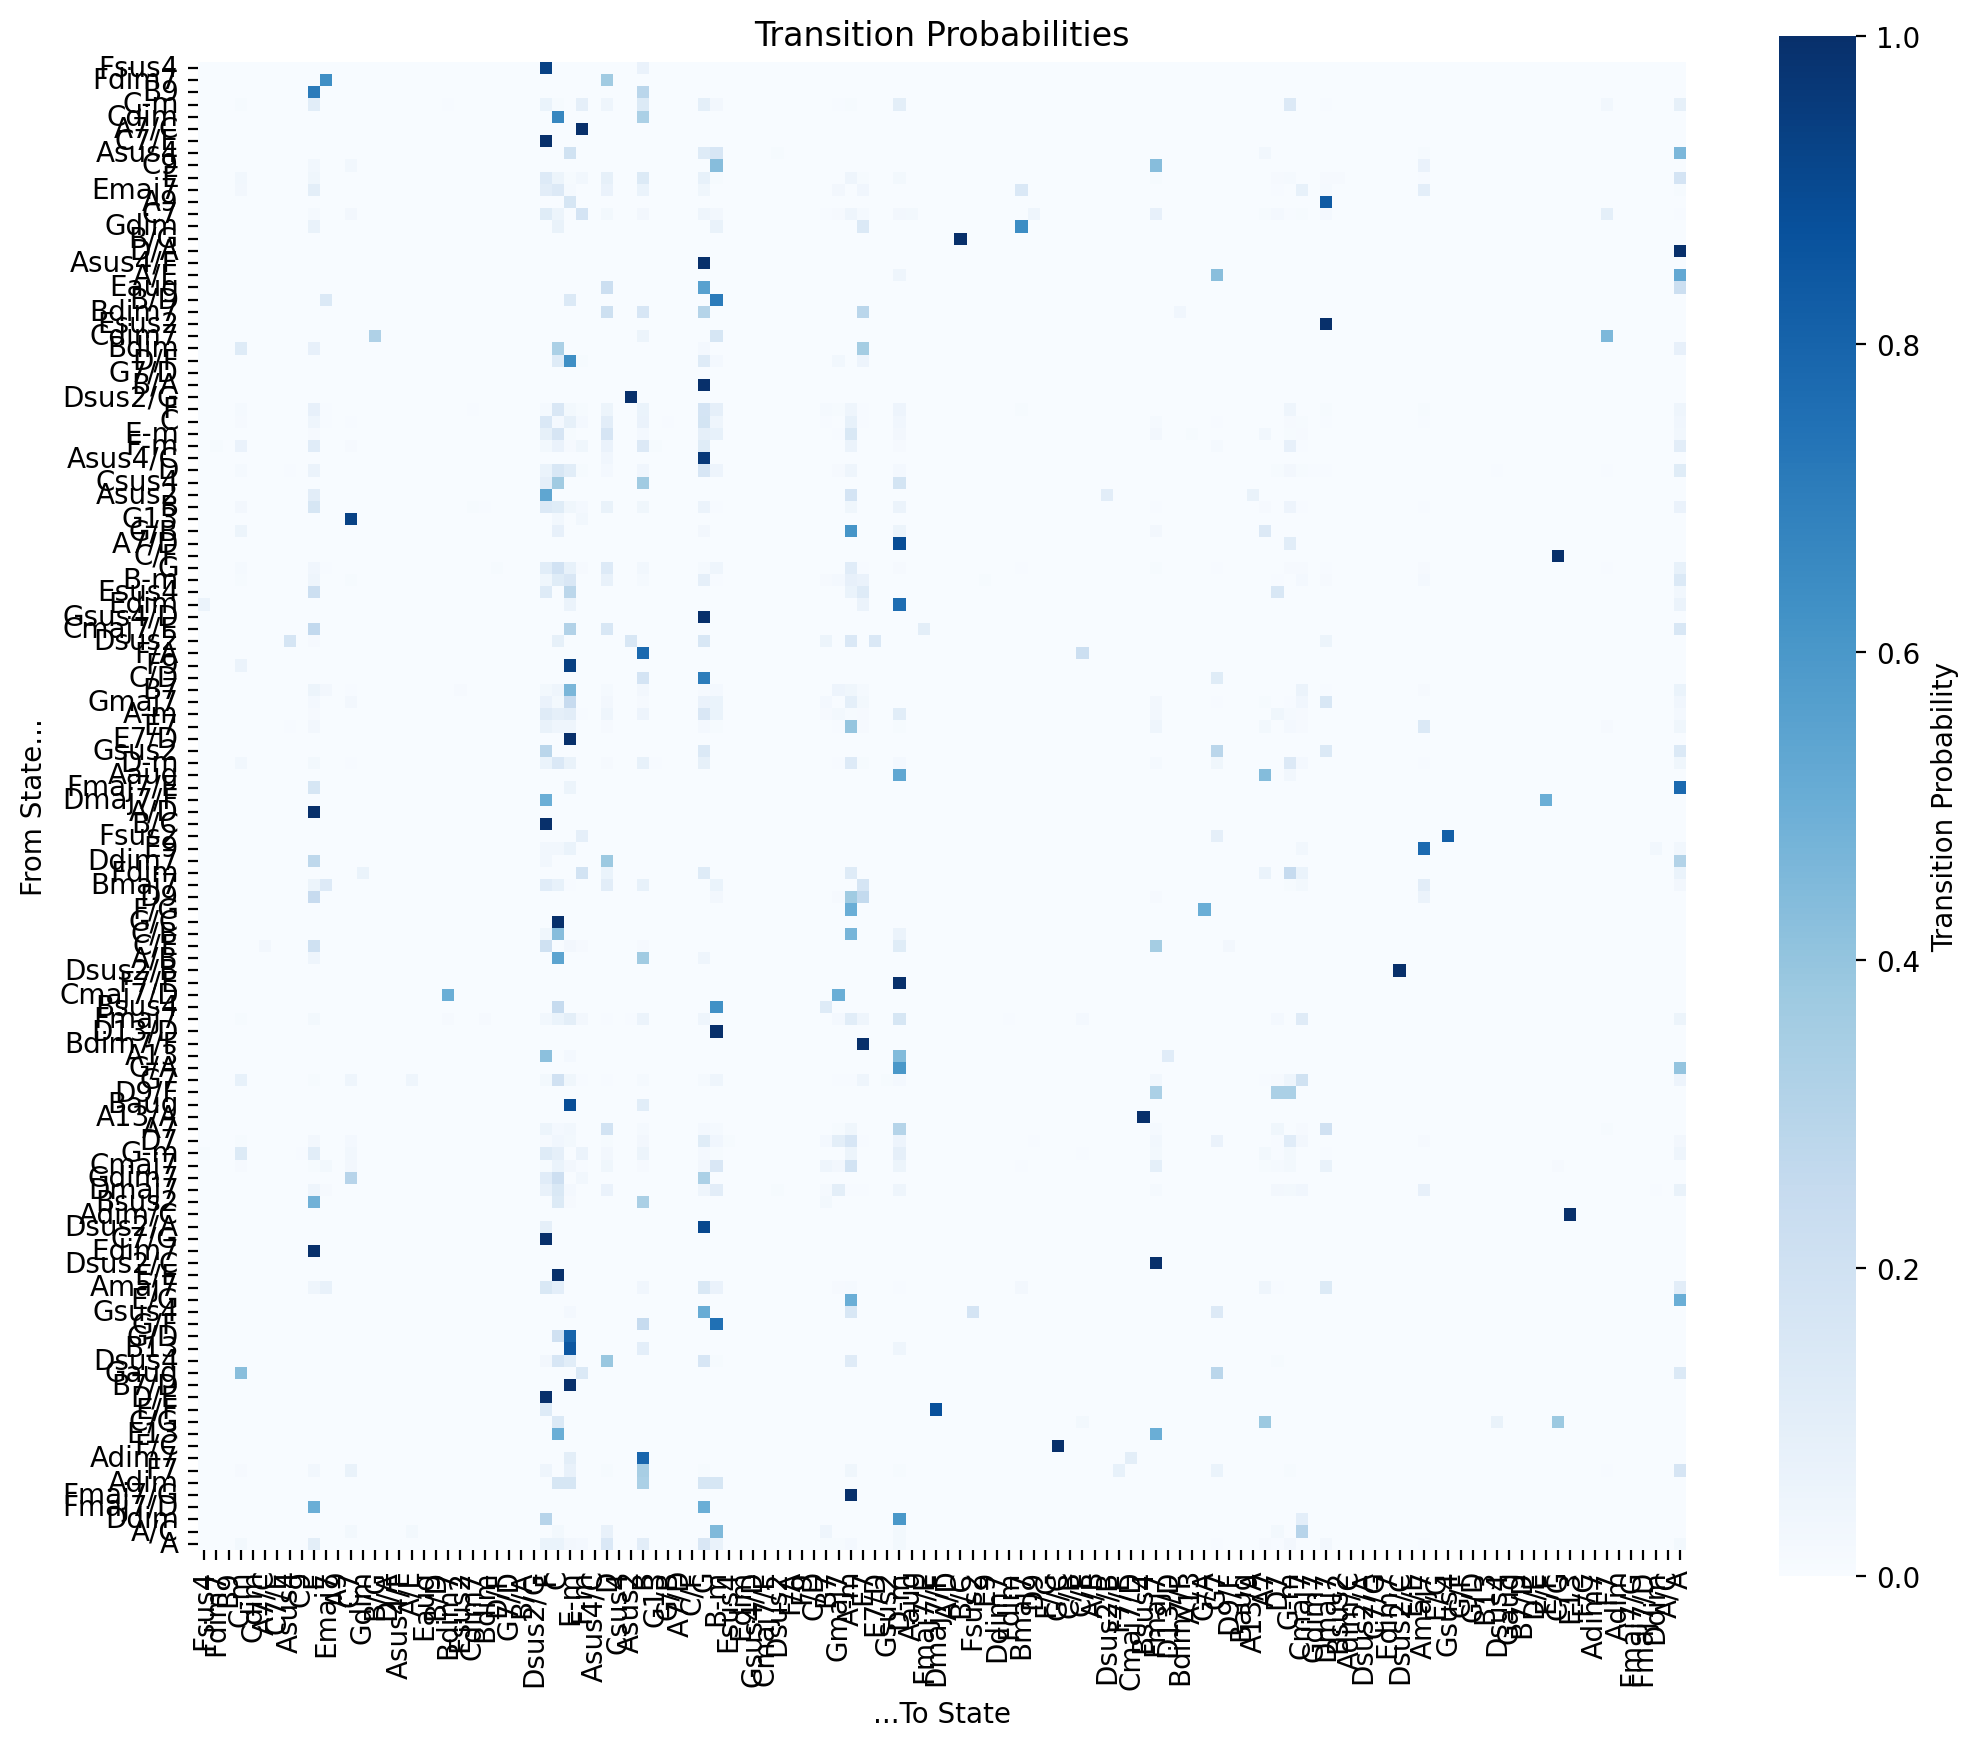

In [188]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [189]:
max_index = np.unravel_index(np.argmax(tr_pr), tr_pr.shape)
from_state_index, to_state_index = max_index
initial_state = states[from_state_index]
second_state = states[to_state_index]
print(f"Most common transition: {initial_state} → {second_state}")

Most common transition: A7/C → F-m


In [190]:
np.random.seed(100)
n_sim = 20
simulation = [initial_state, second_state]

state_index = to_state_index  # start from the second chord

for t in range(n_sim - 2):
    next_state = np.random.choice(states)  # still uniform, or you can switch to probabilities
    simulation.append(next_state)

print("Generated chord sequence:")
print(simulation)

# --- 4️⃣ Convert to music21 stream and play ---
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')

Generated chord sequence:
['A7/C', 'F-m', np.str_('C9'), np.str_('D/F'), np.str_('Bmaj7'), np.str_('G/F'), np.str_('A7'), np.str_('D13/D'), np.str_('F/A'), np.str_('Emaj7'), np.str_('Adim/C'), np.str_('Gmaj7'), np.str_('Dsus2/C'), np.str_('A-m'), np.str_('Fdim'), np.str_('Dsus2/C'), np.str_('B/G'), np.str_('Csus4'), np.str_('F/C'), np.str_('E13')]


## Order 2 Markov Chain